# <h1 align="center">EDA and Model Analysis</h1>

## Data
**I retrieved this data from the following link: https://www.kaggle.com/datasets/pooriamst/best-books-ever-dataset/data. The dataset contains 25 variables and 52478 records corresponding to books on the GoodReads Best Books Ever list. This is a list of The best books ever, as voted on by the general Goodreads community.**

## Problem Definition
I'm curious to understand why readers chose the books they did as "the best books ever". I'm planning on comparing the relative position of a book in the list to its rating, total number of awards, and a few other variables.

Type of Problem: Supervised Learning: Regression problem. 

## Objective:
Predict the rank of a book based on its rating and total number of awards.



In [1]:
# Supervised Learning problem to perform EDA and model analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# import plotly.express as px
import seaborn as sns
# from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/mnt/d/repo/eda-model-analysis-supervised-learning/dataset/bestBooks.csv')

print(df.head())

                                        bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                       title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    

In [2]:
df.tail()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],...,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],...,NaN,[],246,"['106', '73', '42', '17', '8']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


In [3]:
# General information about the dataset
df.shape
df.columns
df.info()
df.describe()
df.describe(include='all')
df.isnull().sum()
df.isnull().sum().sum()
df.isnull().sum().sum()/df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

2.4198521285109953

## CLEANING THE DATA

In [4]:
df.columns = df.columns.str.strip()
print(df.columns)

# Handle missing values
df['series'].fillna('Unknown', inplace=True)
df['description'].fillna('No description', inplace=True)
df['language'].fillna('Unknown', inplace=True)

# Standardize date formats
df['publishDate'] = pd.to_datetime(df['publishDate'], errors='coerce')
df['firstPublishDate'] = pd.to_datetime(df['firstPublishDate'], errors='coerce')

# Convert awards to numeric
df['awards_count'] = df['awards'].apply(lambda x: len(eval(x)) if x != '[]' else 0)

# Convert pages and price to numeric
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Feature selection
features = ['rating', 'awards_count', 'numRatings', 'likedPercent', 'bbeVotes']

# Normalize/Standardize features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Check the cleaned and prepared data
print(df[features].head())

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')
     rating  awards_count  numRatings  likedPercent   bbeVotes
0  0.839243     31.921411   61.176348      0.629058  82.603430
1  1.302278      6.743293   23.952796      0.962913  72.870391
2  0.703056      2.809212   43.130969      0.462131  63.131935
3  0.648581     -0.338053   28.672828      0.295203  55.341170
4 -1.149084     19.332352   47.589572     -2.375634  40.230987


In [5]:
# Drop unnecessary columns
df.drop(columns=['bookId', 'isbn', 'coverImg'], inplace=True)

# Handle duplicates
df.drop_duplicates(inplace=True)

# Impute missing values for numerical columns
df['pages'].fillna(df['pages'].median(), inplace=True)
df['price'].fillna(df['price'].median(), inplace=True)

# Outlier detection and handling for 'rating' - IQR method
q1 = df['rating'].quantile(0.25)
q3 = df['rating'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['language'], drop_first=True)

# Check the cleaned data
print(df.head())


                                       title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                Unknown   
4                                   Twilight   The Twilight Saga #1   

                                      author    rating  \
0                            Suzanne Collins  0.839243   
1  J.K. Rowling, Mary GrandPré (Illustrator)  1.302278   
2                                 Harper Lee  0.703056   
3  Jane Austen, Anna Quindlen (Introduction)  0.648581   
4                            Stephenie Meyer -1.149084   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  There is a door at the end of a silent corrido...   
2  The unforgettable novel of a childhood in a sl...   


## EDA AND VISUALIZATION
### Original Data - Features' distribution

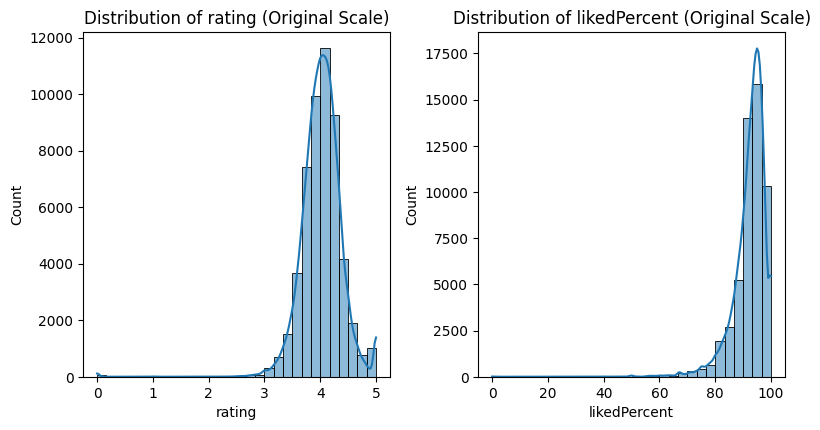

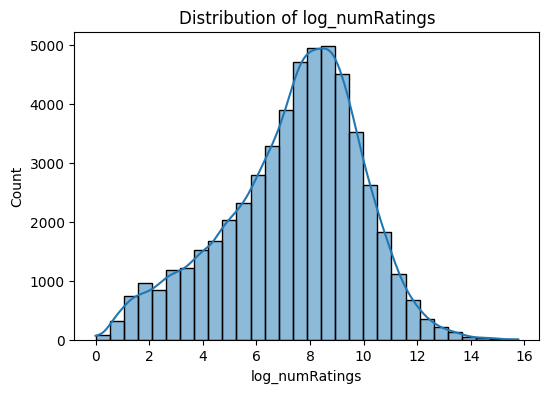

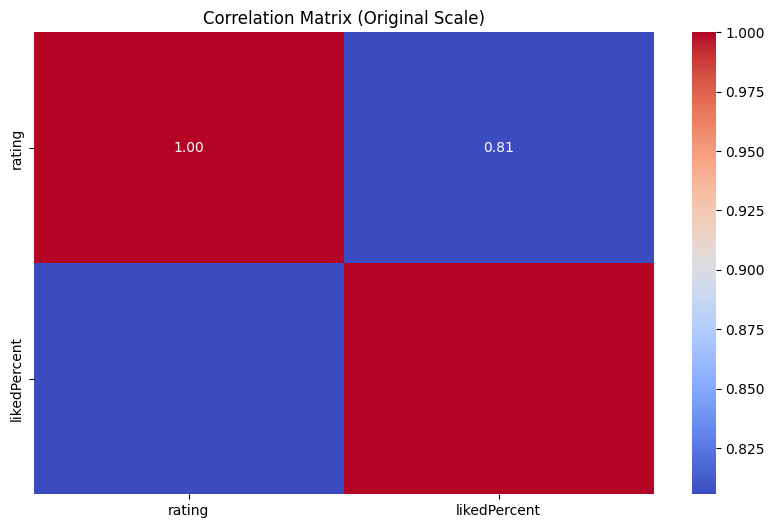

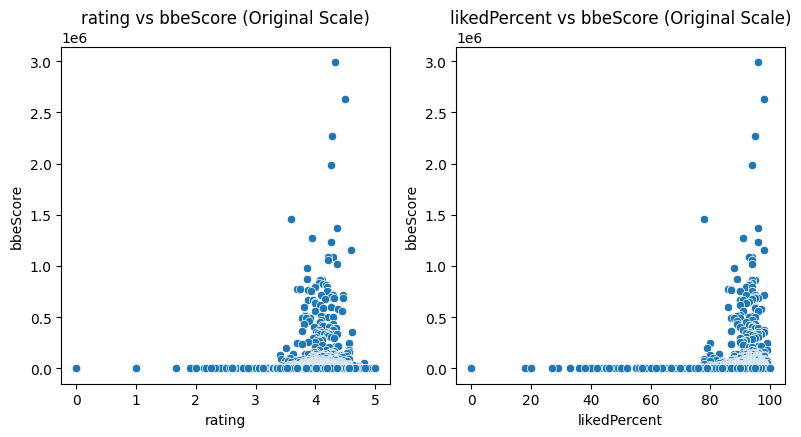

In [14]:
original_features = ['rating', 'likedPercent']

df_original = pd.read_csv('/mnt/d/repo/eda-model-analysis-supervised-learning/dataset/bestBooks.csv')

# Convert necessary columns to numeric
df_original['numRatings'] = pd.to_numeric(df_original['numRatings'], errors='coerce')
df_original['likedPercent'] = pd.to_numeric(df_original['likedPercent'], errors='coerce')
df_original['bbeVotes'] = pd.to_numeric(df_original['bbeVotes'], errors='coerce')
df_original['awards_count'] = df_original['awards'].apply(lambda x: len(eval(x)) if x != '[]' else 0)

# EDA: Visualize distributions with original values
plt.figure(figsize=(12, 8))
for i, feature in enumerate(original_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_original[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature} (Original Scale)')
plt.tight_layout()
plt.show()

# Apply log transformation to numRatings
df_original['log_numRatings'] = np.log1p(df_original['numRatings'])

# EDA: Visualize distribution of log-transformed numRatings - This transformation compresses the scale, making large values more manageable and the graph more readable.
plt.figure(figsize=(6, 4))
sns.histplot(df_original['log_numRatings'], kde=True, bins=30)
plt.title('Distribution of log_numRatings')
plt.xlabel('log_numRatings')
plt.ylabel('Count')
plt.show()

# EDA: Correlation matrix with original values
plt.figure(figsize=(10, 6))
corr_matrix_original = df_original[original_features].corr()
sns.heatmap(corr_matrix_original, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Original Scale)')
plt.show()

# EDA: Explore relationships with original values
plt.figure(figsize=(12, 8))
for i, feature in enumerate(original_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df_original[feature], y=df_original['bbeScore'])
    plt.title(f'{feature} vs bbeScore (Original Scale)')
plt.tight_layout()
plt.show()

### Comparing different features to bbeVotes

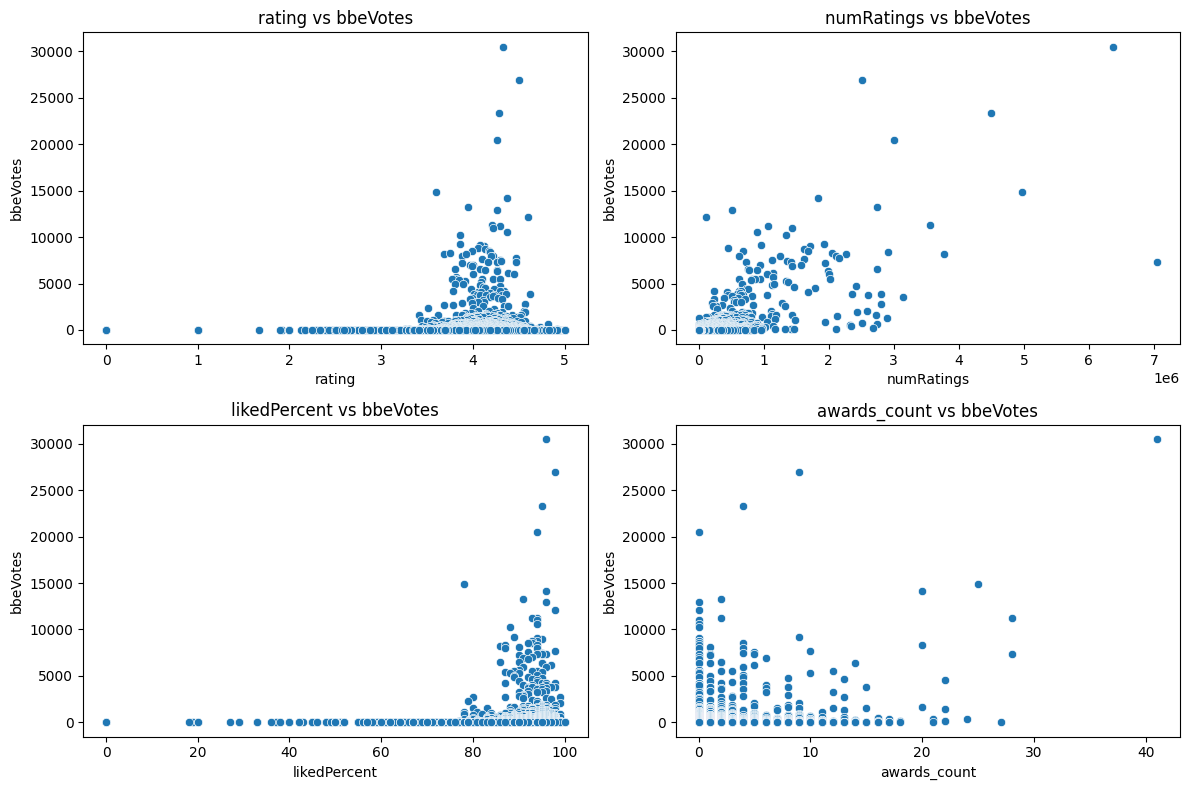

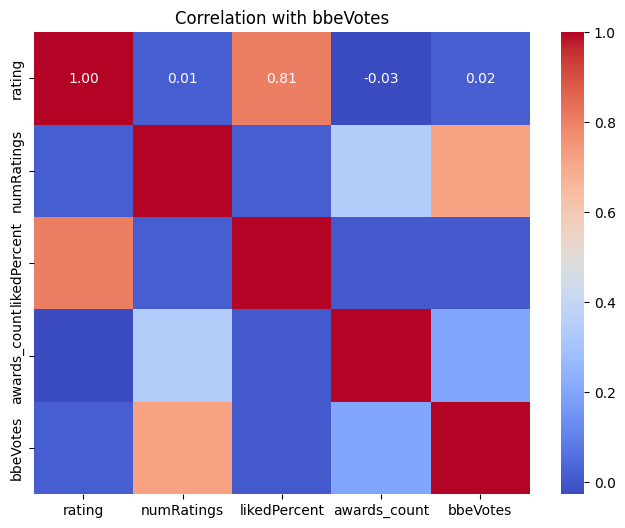

In [15]:
# Features to compare with bbeVotes
comparison_features = ['rating', 'numRatings', 'likedPercent', 'awards_count']

# Visualize relationships with bbeVotes
plt.figure(figsize=(12, 8))
for i, feature in enumerate(comparison_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_original[feature], y=df_original['bbeVotes'])
    plt.title(f'{feature} vs bbeVotes')
    plt.xlabel(feature)
    plt.ylabel('bbeVotes')
plt.tight_layout()
plt.show()

# Correlation analysis
corr_matrix_bbeVotes = df_original[comparison_features + ['bbeVotes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_bbeVotes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation with bbeVotes')
plt.show()

## Machine Learning Model - Linear Regression

Problem: Predict the rank of a book based on its rating and total number of awards.
To achieve this, I'll use a linear regression model. The data will be split into training and testing sets, and the model will be trained on the training set and evaluated on the testing set.

To evaluate the model, I'll use the mean squared error (MSE)? and R-squared (R2) metrics?.